# Problem Set 3: Distributions and histograms

In a standard deck of 52 cards, what is the probability 
that when drawing a hand of size 5 you get exactly 2 of a kind?

n choose k = (n!)/(n!(n-k)!)

What is the probability of drawing a full house? (3 of one kind, 2 of another)

P(Full house) = Number of ways an event can happen / total number possible hands

(13 Choose 1)(4 choose 3)(12 choose 1)(4 choose 2)/( 52 choose 5 )

Bonus problem we might skip, but something to work on for yourself:
    Let f(N) by a function that returns integer uniformly distributed between 1 and N, i.e. f(N) is about Unif(1,N). What is the pmf (distribution of) f(f(N))?
    
    put another wya, suppose you generate a random int between 1 and N, then generate a second int uniformly distributed between 1 and first num generated. Then what is the distrib of the 2nd int?
    
    Hint: Law of total probabilty
    
    n choose k the number of ways one can select k ways from n things without reselection

## Q1: Poisson Daffodils

[We will do this problem together during lab session. Some of it will be on paper, ask a TA to check your work.]

It is often said that April showers bring May flowers. But from some quick research it looks like sunnier April's are more predictive of (positively correlated with) flower bloomage.

Suppose that the number of daffodils that bloom is well modeled as a poisson random variable whose rate is dependent on the amount of sun in April. In particular, suppose that whenever the previous April was "rainy", the number of daffodils that bloom in May is a Poisson random variable with mean $\lambda_{rainy} = 50$ while for "sunny" Aprils the mean is instead $\lambda_{sunny} = 100$. Also, did I mention that you were somehow able to spend all of April in Key West? You don't know what the weather was like in April, and we're going to use the daffodil count to guess.

1. This being Ithaca, the probability of a dark "rainy" April is $p_{rainy} = .55$. Write the joint probability mass function (pmf) over $D =$ the number of flowers appearing in your garden in May and the indicator variable $R = 1$ when April is a rainy month and $R = 0$ otherwise.

**Answer here** P(D=d, R=r) = 
if x ~ Poisson(d) then P(X=x) = (e^(-λ)*λ^(x)) / (x!)
for r = 0, d = 0 thus λ = 100 thus  (e^(-λ)*λ^(x)) / (x!) =  (e^(-100)*100^(d)) / (d!)
for r = 1, d = 0 

2. Give an expression for the marginal probability P(D) and compute E[D], the expected number of flowers in your garden.

**Answer here**
P(D) = ((λe^-λ)/d!)(0.55))+((λe^-λ)/d!)(0.45)) thus E(D) = (50)(0.55) + (100)(.45) = 72.5

3. Suppose that by the end of May, you observe x=72 daffodils in your garden.  Given this information, was April more likely to have been rainy or sunny?  Use a log likelihood ratio (the log of P(rainy | D=72) / P(sunny | D=72)). Use Bayes
0.29

In [33]:
import math
logofrainy = math.log((((50**72)*math.e**-50)/math.factorial(72))*0.55)

logofsunny = math.log((((100**72)*math.e**-100)/math.factorial(72))*0.45)
p = logofrainy - logofsunny
print(p)

0.2940736951460856


**Answer here** Since the answer is positive, it is more likely to be rainy

4. Find a number of daffodils that would result in a different decision.  For example, if you said that April was more likely to have been sunny, then for what number of observed daffodils $D$ would you instead claim that last month had been rainy? 

In [35]:
import math
logofrainy = math.log((((50**75)*math.e**-50)/math.factorial(72))*0.55)

logofsunny = math.log((((100**75)*math.e**-100)/math.factorial(72))*0.45)
p = logofrainy - logofsunny
print(p)

-1.7853678465337497


**Answer here** by using a number greater than 72, in this case 75 we see that the log of sunny is greater than the log of rainy thus making our probability negative since logofrainy is greater than logofsunny


5. In your session, discuss whether this is a sensible model for flowers and weather. (No plant scientists were consulted in the writing of this problem!) What might be better?

No this is not, as a poisson distribution should be used when the p value is very low but in this case p is random so its not ideal to use a poisson distribution. Similarly, there are not enough intervals that we are testing with and so it would be a better idea to test using more variables that affect the weather and geography.

## Q2: Binomial distribution

In this problem you will consider three cases that we can model with a binomial distribution. You can find facts about binomials [on Wikipedia](https://en.wikipedia.org/wiki/Binomial_distribution). You can simulate distributions and use code, but you shouldn't need to for this problem.

### A: Coin flipping

All 15,182 Cornell undergraduates flip a coin 100 times and count the number of heads. We will model this number as a binomial distribution. What is the support of that distribution? How many samples are we taking from that distribution? What is the mean number of heads? (Provide the *distribution* mean, not a sample mean.) What is the standard deviation of the distribution? What number of heads are one, two, and three standard deviations away from the mean? 

**Answer here:** 
support of the distribution = k E {0,1,...,n} = 
0 to 100 

15182 samples (everyone who is an undergrad in Cornell)
50 is the mean number of heads as sample mean

standard deviation = sqrt((p*n(1-p))/()) = sqrt(100 * 0.5 *0.5) = 5   
mean = 0.5*100 =50
1 deviations = 5 (45 and 55) 
2 deviations = 10 (40 and 60)
3 deviations = 15 (35 and 65)

The binomial distribution often behaves very similarly to the normal distribution. This is one of those cases. Use the 68, 95, 99.7 rule we saw in class to provide rough estimates for the following: what proportion of students will get

1. fewer than 45 heads 14%
2. either fewer than 40 heads or fewer than 40 tails 5%
3. more than 65 heads 0.15%
4. between 40 and 50 tails 48%%
5. between 25 and 75 tails 100%

Specifically, a binomial (n,p) distribution can be approximated with a normal distribution with mean mu = np, sigma = sqrt(np)(1 - p)]. 68% of samples from a normal lie within 1 standard deviation from the mean.

**Answer here:**

1. fewer than 45 heads about 14.5%
2. either fewer than 40 heads or fewer than 40 tails about 2.35%
3. more than 65 heads 0.15%
4. between 40 and 50 tails 47.5%%
5. between 25 and 75 tails 100%

### B: Common names

An event for fans of the early 1990s show "Animaniacs" with 500 attendees has 10 Davids. Looking around, it seems like everyone is in their late 30s. According to US Social Security Administration data the proportion of Davids born in 1980 is 1.2%.

1. Is this result (10 Davids) surprising? Why or why not?
2. Describe the parameters of a binomial distribution that models this probability.
3. Calculate the mean and standard deviation of this distribution.
4. If this distribution is accurate, what proportion of similar events would have a David count more than three standard deviations above the mean? Below the mean? (Using simulations with `numpy.random.binomial` may be useful here)
5. Does the 68, 95, 99.7 rule apply in this case? Why or why not?
6. Consider a nearby event for Spongebob fans, who are significantly younger. If the proportion of Davids born in 2000 is 0.0005, how surprised would you be to find 10 Davids? Why?

**Answer here:**
1. No the result is not very surprising as there are 10/500 or 2.0% Davids in this sample when in the population proportion of Davids is also very similar 1.2% Similarly the survey may not be fullly accurate but its close enough
2.  n = number of trials = 500 student population 
    p = success of probability for each trial = probability it is heads = 0.12
    also the number ot trials we want to run can make a difference
3.  mean = np = 500*0.12 = 6 
500*0.012 = 6
sqrt(1-0.012*500*0.012) = 2.435
    SD = sqrt((p(1-p))*(n))
4. events with 3 standard deviations above or below the mean would be 2.435*3. Since items below the mean would yield negative results we are not going to include that Since the ratio recieved from the program doesn't match, This is a very low number meaning that there are very few results above 3 standard deviations 0.0041 < 0.015
5. The 68,95, 99.7 rule doesn't apply in this case as evident through testing for the program below and because the data is not normal or large enough
6. Yes i would be very surprised because there is a much lower proportion in this population much lower than the tested sample

[15, 14, 14, 14, 15, 17, 15, 14, 15, 14, 15, 16, 14, 14, 14, 15, 16, 14, 16, 15, 17, 14, 14, 16, 15, 14, 14, 14, 17, 14, 15, 14, 15, 14, 14, 16, 14, 15, 14, 16, 14]
length:  41
ratio:  0.0041


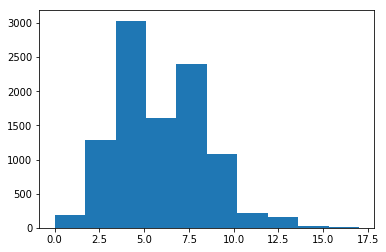

In [17]:
from matplotlib import pyplot
import numpy 
print(2.435*3)

sampleq= numpy.random.binomial(500, 0.012,10000)
amount = [i for i in sampleq if i > 13.305 ]
print(amount)
l = len(amount)
print('length: ', l)
print('ratio: ', l/10000)
pyplot.hist(sampleq)
pyplot.show()

7.305
length:  1440
ratio:  0.144


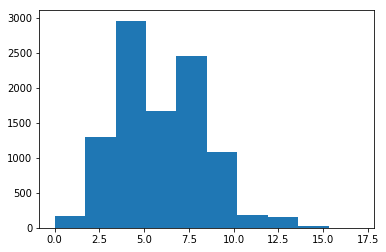

In [19]:
from matplotlib import pyplot
import numpy 
print(2.435*3)

sampleq= numpy.random.binomial(500, 0.012,10000)
amount = [i for i in sampleq if i > 6 + 2.435]
# print(amount)
l = len(amount)
print('length: ', l)
print('ratio: ', l/10000)
pyplot.hist(sampleq)
pyplot.show()

[15, 14]


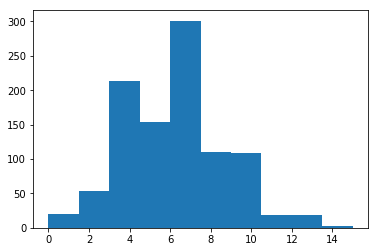

In [9]:
from matplotlib import pyplot
import numpy 

sampleq= numpy.random.binomial(500, 0.012,1000)
amount = [i for i in sampleq if i > 13.3 ]
print(amount)
pyplot.hist(sampleq)
pyplot.show()

In [ ]:
since the p is very small it is not going to follow this 

## Q3: A visit to the distribution zoo; the central limit theorem

There's an important result in statistics called the central limit theorem. It says that, under conditions that are usually true, the *mean* of random samples from a distribution behaves like a Gaussian random variable, even if the distribution you're sampling from behaves nothing like a Gaussian. We're going to see if this is true for a number of different probability distributions.

For each of the following distributions you will do the following:

1. Create a function that returns an array containing 1000 samples from that probability distribution with the specified parameters. The [documentation for numpy.random](https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html) has useful functions.

2. Use `pyplot` to display a histogram of one array of 1000 numbers from that function.

3. Create an array of zeros of length 1000 (see numpy docs for a useful function) called `[dist]_sample_means`, for example `normal_sample_means`. Run your 1000-sample function 1000 times, and save the means of the arrays returned by the function in the `[dist]_sample_means` array.

4. Use `pyplot` to display a histogram of the 1000 saved means.

For every distribution I'm including an OPTIONAL "hand made" recipe if you'd like an extra challenge. This will add no extra points, but you will learn about relationships between distributions!

### A: Normal (Gaussian) distribution

Create a function `normal_1000` that returns an array of `size` 1000 from a normal distribution with mean 0.0 and standard deviation 1.0. You may use `numpy.random.normal()`, or (OPTIONAL hand-made version) implement the Box-Muller transform (if you want to try this, you can find details yourself). Display two histograms as specified above.

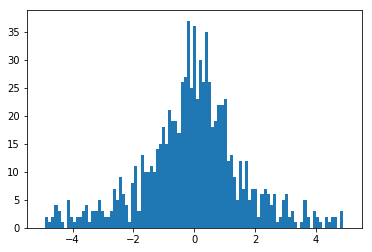

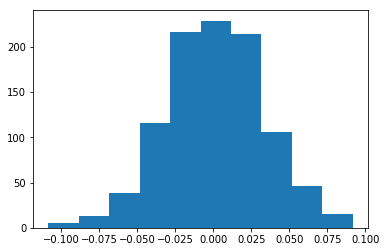

In [48]:
from matplotlib import pyplot
import numpy
def normal_1000(mean,sd):
    return numpy.random.normal(mean, sd, 1000)
pyplot.hist(sample, bins = numpy.linspace(-5,5, 100))
pyplot.show()
sample = normal_1000(0.0,1.0)
# print(sample)
a = numpy.zeros(1000)
for i in range(1000):
    a[i] = numpy.mean(normal_1000(0,1))
pyplot.hist(a)
pyplot.show()


### B: Lognormal distribution

The lognormal is a distribution over positive real numbers whose *log* is normally distributed. Create a function `lognormal_1000` that returns an array of `size` 1000 from a lognormal distribution with mean 0.0 and standard deviation 1.0. You can either use the numpy function (see the docs) or use `numpy.random.normal()` and exponentiate the result with `numpy.exp()`. Display two histograms as specified above.

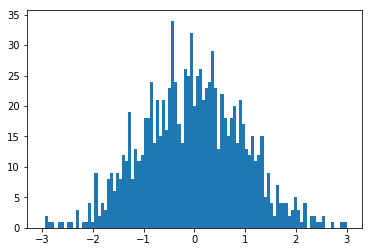

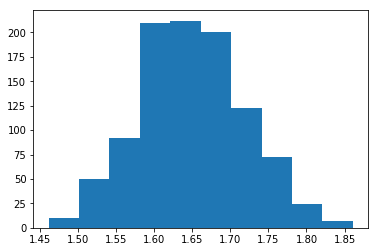

In [40]:
from matplotlib import pyplot
import numpy
def lognormal_1000(mean,sd):
    return numpy.random.lognormal(mean, sd, 1000)
pyplot.hist(sample, bins = numpy.linspace(-3,3, 100))
pyplot.show()
sample = lognormal_1000(0.0,1.0)
a = numpy.zeros(1000)
for i in range(1000):
    a[i] = numpy.mean(lognormal_1000(0,1))
pyplot.hist(a)
pyplot.show()

### C: Exponential distribution

Create a function `exponential_1000` that returns an array of `size` 1000 from an exponential distribution with scale 1.0. You can either use the numpy function or use `numpy.random.random()`, call `numpy.log()` on it and negate the result. Display two histograms as specified above.

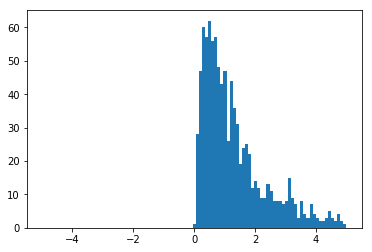

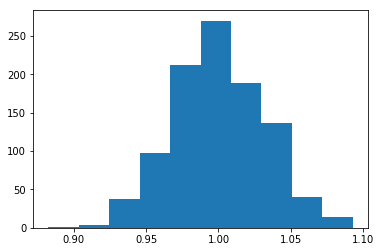

In [41]:
def exponential_1000(scale):
    return numpy.random.exponential(scale, 1000)
pyplot.hist(sample, bins = numpy.linspace(-5,5, 100))
pyplot.show()
sample = exponential_1000(1.0)
a = numpy.zeros(1000)
for i in range(1000):
    a[i] = numpy.mean(exponential_1000(1.0))
pyplot.hist(a)
pyplot.show()

### D: Negative binomial

The negative binomial is similar to the Poisson but more flexible: it can have variance different from its mean. Create a function `neg_bin_1000` that returns an array of `size` 1000 from a negative binomial distribution with `n` 5 and `p` 0.3 using the numpy function, or by counting the number of times you get values from `numpy.random.random()` greater than 0.3 before you get five values less than 0.3. Display two histograms as specified above.

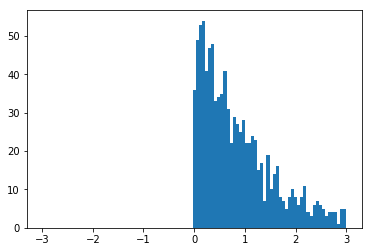

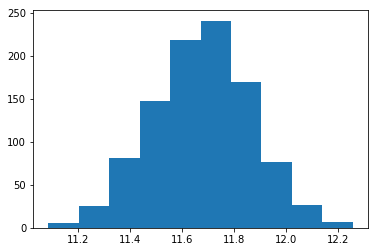

In [44]:
def neg_bin_1000(n,p):
    return numpy.random.negative_binomial(n, p, 1000)
pyplot.hist(sample, bins = numpy.linspace(-3,3, 100))
pyplot.show()
sample = neg_bin_1000(5,0.3)
a = numpy.zeros(1000)
for i in range(1000):
    a[i] = numpy.mean(neg_bin_1000(5,0.3))
pyplot.hist(a)
pyplot.show()

### E: Gumbel

Gumbel distribution. The Gumbel distribution is often used to estimate the probability of extreme events like floods. Create a function `gumbel_1000` that returns an array of `size` 1000 from a gumbel distribution with location 0.0 and scale 1.0 using `numpy.random.gumbel()` or take the negative log of an exponential random variable. Display two histograms as specified above.

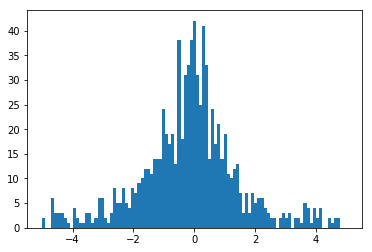

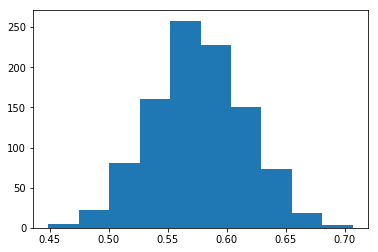

In [50]:
def gumbel_1000(loc,scale):
    return numpy.random.gumbel(loc, scale, 1000)
pyplot.hist(sample, bins = numpy.linspace(-5,5, 100))
pyplot.show()
sample = gumbel_1000(0.0,1.0)
a = numpy.zeros(1000)
for i in range(1000):
    a[i] = numpy.mean(gumbel_1000(0.0,1.0))
pyplot.hist(a)
pyplot.show()

### F: Cauchy

Remember about those "conditions that are usually true"? This one doesn't meet them, so expect this to look... different. Create a function `cauchy_1000` that returns an array of `size` 1000 from a Cauchy distribution. You can either use `numpy.random.standard_t()` with `df` 1.0, or generate two arrays of Gaussians and divide one by the other. 

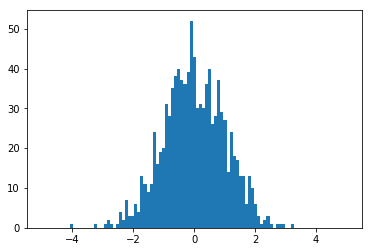

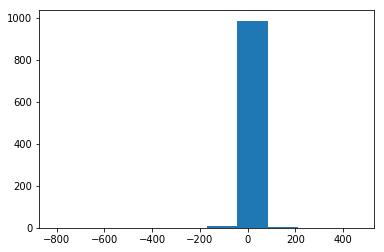

In [49]:
def  cauchy_1000(df):
    return numpy.random.standard_t(df, 1000)
pyplot.hist(sample, bins = numpy.linspace(-5,5, 100))
pyplot.show()
sample = cauchy_1000(1.0)
a = numpy.zeros(1000)
for i in range(1000):
    a[i] = numpy.mean(cauchy_1000(1.0))
pyplot.hist(a)
pyplot.show()

What do you notice about all of these histograms? Why might this be surprising? How is the Cauchy different?

**Answer here:** With the exception of Cauchy they all look very similar to the normal distribution. This is likely because they all have a large sample size of a 1000. Cauchy on the other hand is different because it doesn't have a set value to be based on.